# Machine Learning Visualizations

Once we have run some models using *sklearn* we should try and use *yellowbrick* to build some visualizations from the models we have run. <br>
MJH: Added matplotlib visualizations of team and predicted ratings by year

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime as dt
import matplotlib.patches as mpatches

# Visualizations of Event Ratings

## Visualize Original Team Event Ratings

In [62]:
# Read in data = EventID, Date, EventText, FilterWords, FinalRating

teamratings = pd.read_csv('Events_FinalRatingsList.csv', encoding='utf-8')
teamratings = teamratings.sort_values(by='Date')
teamratings['Date'] = pd.to_datetime(teamratings['Date'])

In [63]:
# Prepare the dataframe for visualization

# Split out month and year for grouping
monthlist = []
daylist = []
yearlist = []
for index, row in teamratings.iterrows():
    monthlist.append(row['Date'].strftime('%m'))
    daylist.append(row['Date'].strftime('%d'))
    yearlist.append(row['Date'].strftime('%Y'))
teamratings['Day'] = daylist
teamratings['Month'] = monthlist
teamratings['Year'] = yearlist

teamratings['FinalRating'] = teamratings['FinalRating'].astype(int)

# Use the ratings 0, 1, 2, 3  
eventmask = (teamratings['FinalRating'] >= 0) & (teamratings['FinalRating'] <= 3)
teamratings = teamratings.loc[eventmask]

teamratings = teamratings.drop('FilterWords', 1)
teamratings = teamratings.rename(columns={'FinalRating': 'TeamRating'})
teamratings.head()

,EventID,Date,EventText,TeamRating,Day,Month,Year
171,4004,2012-01-01,According to Iranian state news agency PressTV...,1,01,01,2012
168,4001,2012-01-01,"Neoconservative commentator Nick Cohen, writin...",1,01,01,2012
169,4002,2012-01-01,"The Arab Parliament, a consultative pan-Arab b...",1,01,01,2012
170,4003,2012-01-01,Assad insider and Syrian security officer Colo...,2,01,01,2012
367,7002,2013-01-01,An anonymous Syrian student at the West Virgin...,0,01,01,2013


### Create Visualization of Raw Event Rating Counts for Original Team Ratings

In [64]:
teamdf = pd.crosstab(teamratings.Year, teamratings.TeamRating,  margins=False)
teamdf = teamdf.rename(columns={0: '0-friendly', 1: '1-neutral', 2: '2-threatening', 3: '3-aggressive' })
teamdf

TeamRating,0-friendly,1-neutral,2-threatening,3-aggressive
Year,,,,
2011,1,19,44,46
2012,5,47,55,47
2013,2,14,12,11
2014,1,6,13,13
2015,3,7,12,14
2016,3,10,15,11
2017,4,4,4,4


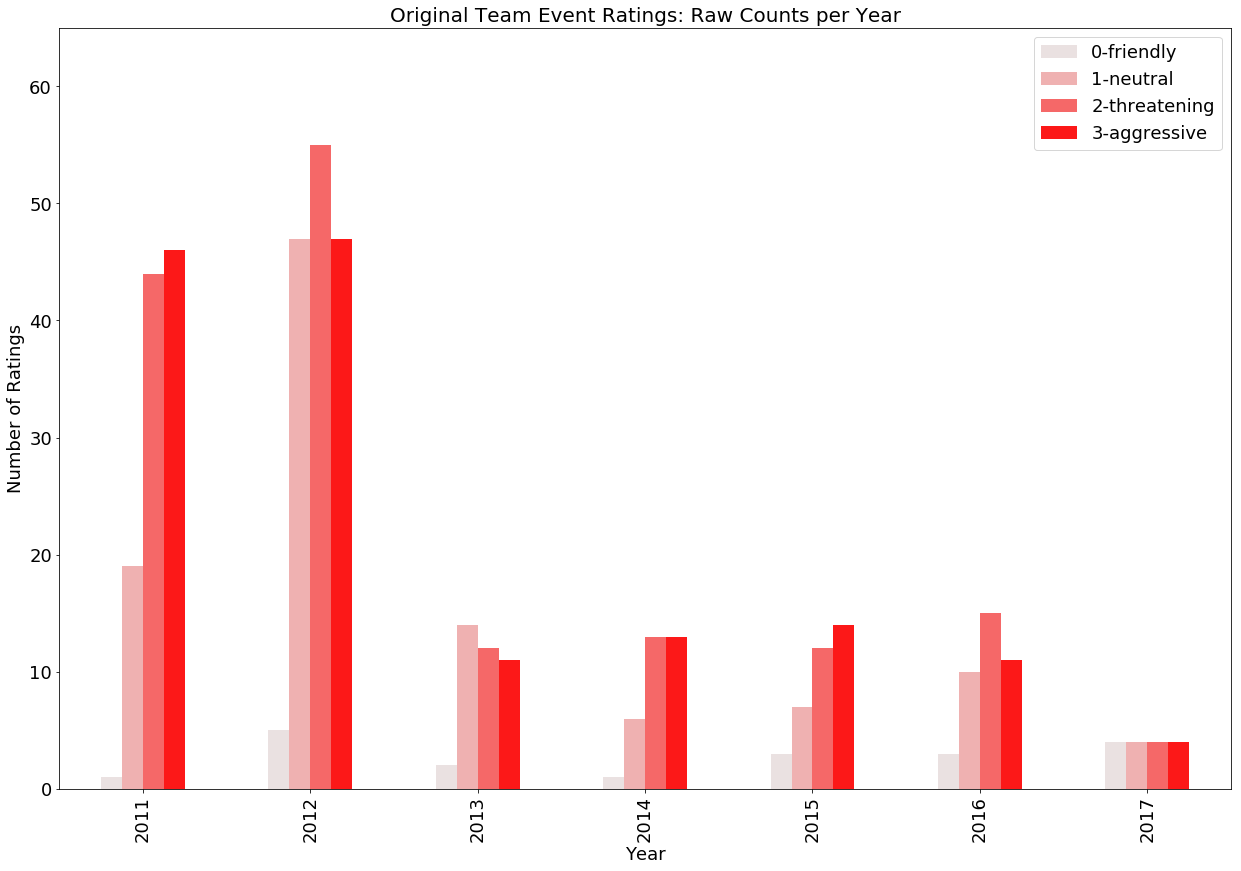

In [65]:
team_colors = ['#eae1e1','#EFB1B1','#F56868','#FC1818']
ax = teamdf[['0-friendly', '1-neutral', '2-threatening', '3-aggressive']].plot(kind='bar', title ="Original Team Event Ratings: Raw Counts per Year",
                                                                               figsize=(21,14), color=team_colors, legend=True, fontsize=18)
ax.set_xlabel("Year",fontsize=18)
ax.set_ylabel("Number of Ratings",fontsize=18)
ax.set_ylim(0,65)
ax.legend(loc=1, prop={'size': 18})
ax.title.set_fontsize(20)
plt.show()

### Create Visualization of Event Rating Percentages for Original Team Ratings

In [66]:
teamdf = pd.crosstab(teamratings.Year, teamratings.TeamRating,  normalize='index', margins=False)
teamdf = teamdf.rename(columns={0: '0-friendly', 1: '1-neutral', 2: '2-threatening', 3: '3-aggressive' })
teamdf

TeamRating,0-friendly,1-neutral,2-threatening,3-aggressive
Year,,,,
2011,0.009091,0.172727,0.400000,0.418182
2012,0.032468,0.305195,0.357143,0.305195
2013,0.051282,0.358974,0.307692,0.282051
2014,0.030303,0.181818,0.393939,0.393939
2015,0.083333,0.194444,0.333333,0.388889
2016,0.076923,0.256410,0.384615,0.282051
2017,0.250000,0.250000,0.250000,0.250000


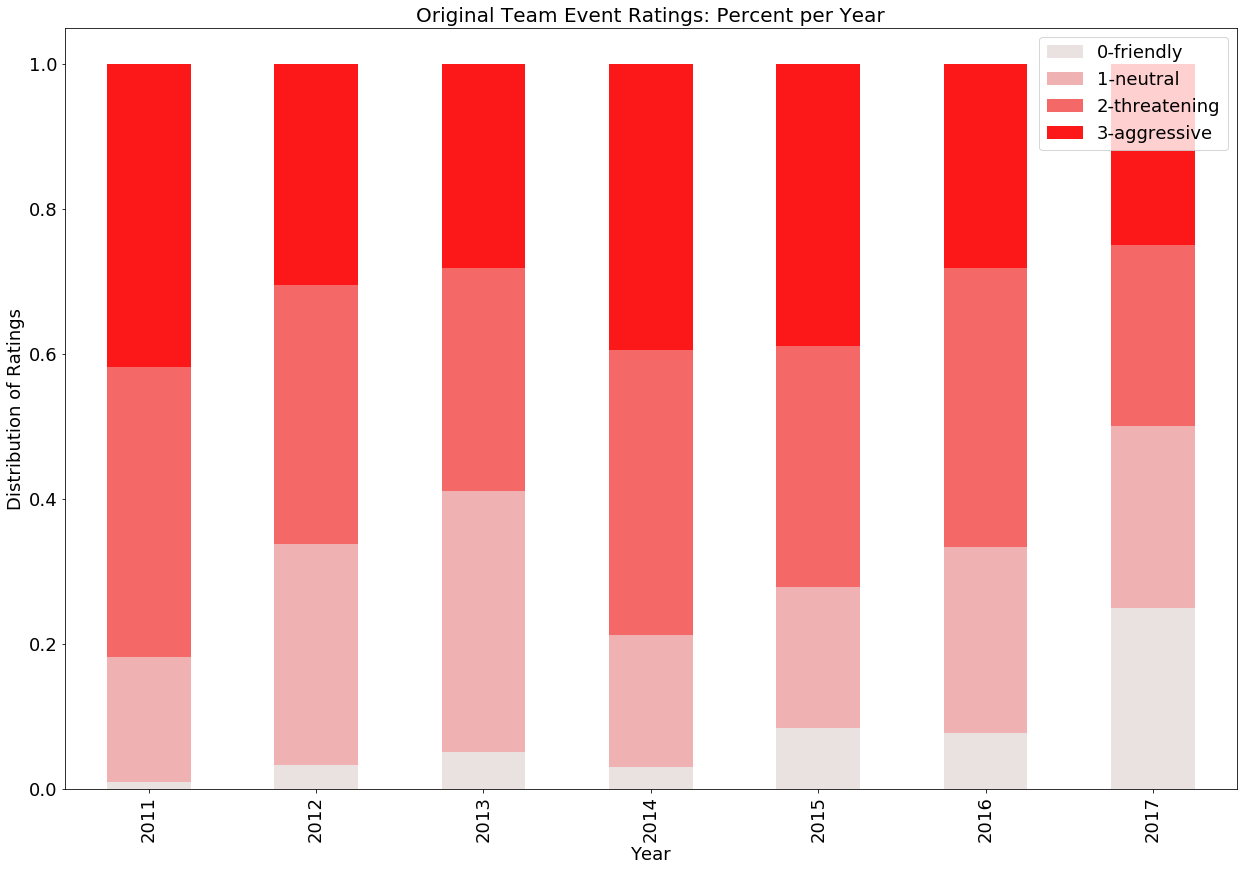

In [67]:
team_colors = ['#eae1e1','#EFB1B1','#F56868','#FC1818']
ax = teamdf[['0-friendly', '1-neutral', '2-threatening', '3-aggressive']].plot(kind='bar', stacked=True, title ="Original Team Event Ratings: Percent per Year",
                                                                               figsize=(21,14), color=team_colors, legend=True, fontsize=18)
ax.set_xlabel("Year",fontsize=18)
ax.set_ylabel("Distribution of Ratings",fontsize=18)
ax.legend(loc=1, prop={'size': 18})
ax.title.set_fontsize(20)
plt.show()

## Visualize Logistic Regression Event Ratings

In [68]:
# Read in data = Date, EventID, FinalRating...

LRratings = pd.read_csv('Logit_predictions.csv', encoding='utf-8')
LRratings = LRratings.sort_values(by='FinalRating')
LRratings['Date'] = pd.to_datetime(LRratings['Date'])

In [69]:
LRratings

,Unnamed: 0,Date,EventID,FinalRating
87,87,2012-01-07,4027.0,2.0
60,60,2011-10-15,3066.0,2.0
94,94,2012-01-22,4074.0,2.0
239,239,2014-10-18,10047.0,2.0
57,57,2011-10-09,3059.0,2.0
238,238,2014-10-12,10045.0,2.0
198,198,2013-05-12,8012.0,2.0
237,237,2014-10-11,10044.0,2.0
140,140,2012-06-23,5137.0,2.0
98,98,2012-01-28,4096.0,2.0


In [70]:
# Prepare the dataframe for visualization

# Split out month and year for grouping
monthlist = []
daylist = []
yearlist = []
for index, row in LRratings.iterrows():
    monthlist.append(row['Date'].strftime('%m'))
    daylist.append(row['Date'].strftime('%d'))
    yearlist.append(row['Date'].strftime('%Y'))
LRratings['Day'] = daylist
LRratings['Month'] = monthlist
LRratings['Year'] = yearlist
LRratings['Year'] = LRratings['Year'].astype(int)
LRratings['Month'] = LRratings['Month'].astype(int)
LRratings['FinalRating'] = LRratings['FinalRating'].astype(int)

LRratings = LRratings.rename(columns={'FinalRating': 'LR_Rating'})
LRratings.head()

,Unnamed: 0,Date,EventID,LR_Rating,Day,Month,Year
87,87,2012-01-07,4027.0,2,07,1,2012
60,60,2011-10-15,3066.0,2,15,10,2011
94,94,2012-01-22,4074.0,2,22,1,2012
239,239,2014-10-18,10047.0,2,18,10,2014
57,57,2011-10-09,3059.0,2,09,10,2011


### Create Visualization of Raw Event Rating Counts for Logistic Regression Event Ratings

In [71]:
LRdf = pd.crosstab(LRratings.Year, LRratings.LR_Rating, margins=False)
LRdf = LRdf.rename(columns={0: '0-friendly', 1: '1-neutral', 2: '2-threatening', 3: '3-aggressive' })
LRdf

LR_Rating,2-threatening,3-aggressive
Year,,
2011,21,63
2012,23,76
2013,9,24
2014,8,23
2015,6,24
2016,9,24


In [72]:
LRdf['0-friendly'] = [0,0,0,0,0,0]
LRdf['1-neutral'] = [0,0,0,0,0,0]
LRdf

LR_Rating,2-threatening,3-aggressive,0-friendly,1-neutral
Year,,,,
2011,21,63,0,0
2012,23,76,0,0
2013,9,24,0,0
2014,8,23,0,0
2015,6,24,0,0
2016,9,24,0,0


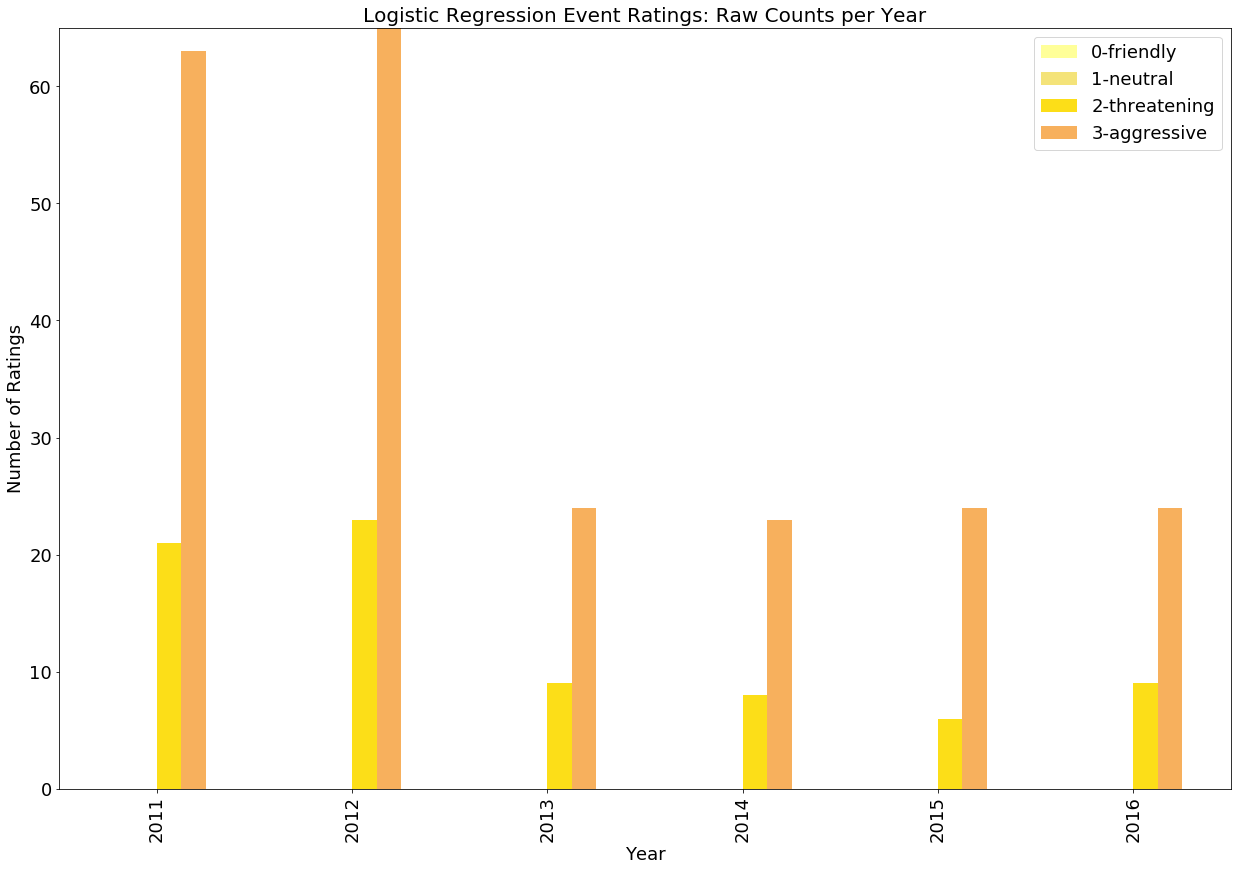

In [73]:
LR_colors = ['#FFFF99','#f4e379','#fcde18','#f7b05d']
ax = LRdf[['0-friendly', '1-neutral', '2-threatening', '3-aggressive']].plot(kind='bar', title ="Logistic Regression Event Ratings: Raw Counts per Year",
                                                                               figsize=(21,14), color=LR_colors, legend=True, fontsize=18)
ax.set_xlabel("Year",fontsize=18)
ax.set_ylabel("Number of Ratings",fontsize=18)
ax.set_ylim(0,65)
ax.legend(loc=1, prop={'size': 18})
ax.title.set_fontsize(20)
plt.show()

### Create Visualization of Event Rating Percentages for Logistic Regression Event Ratings

In [74]:
LRdf = pd.crosstab(LRratings.Year, LRratings.LR_Rating, normalize='index', margins=False)
LRdf = LRdf.rename(columns={0: '0-friendly', 1: '1-neutral', 2: '2-threatening', 3: '3-aggressive' })
LRdf

LR_Rating,2-threatening,3-aggressive
Year,,
2011,0.250000,0.750000
2012,0.232323,0.767677
2013,0.272727,0.727273
2014,0.258065,0.741935
2015,0.200000,0.800000
2016,0.272727,0.727273


In [75]:
LRdf['0-friendly'] = [0,0,0,0,0,0]
LRdf['1-neutral'] = [0,0,0,0,0,0]
LRdf

LR_Rating,2-threatening,3-aggressive,0-friendly,1-neutral
Year,,,,
2011,0.250000,0.750000,0,0
2012,0.232323,0.767677,0,0
2013,0.272727,0.727273,0,0
2014,0.258065,0.741935,0,0
2015,0.200000,0.800000,0,0
2016,0.272727,0.727273,0,0


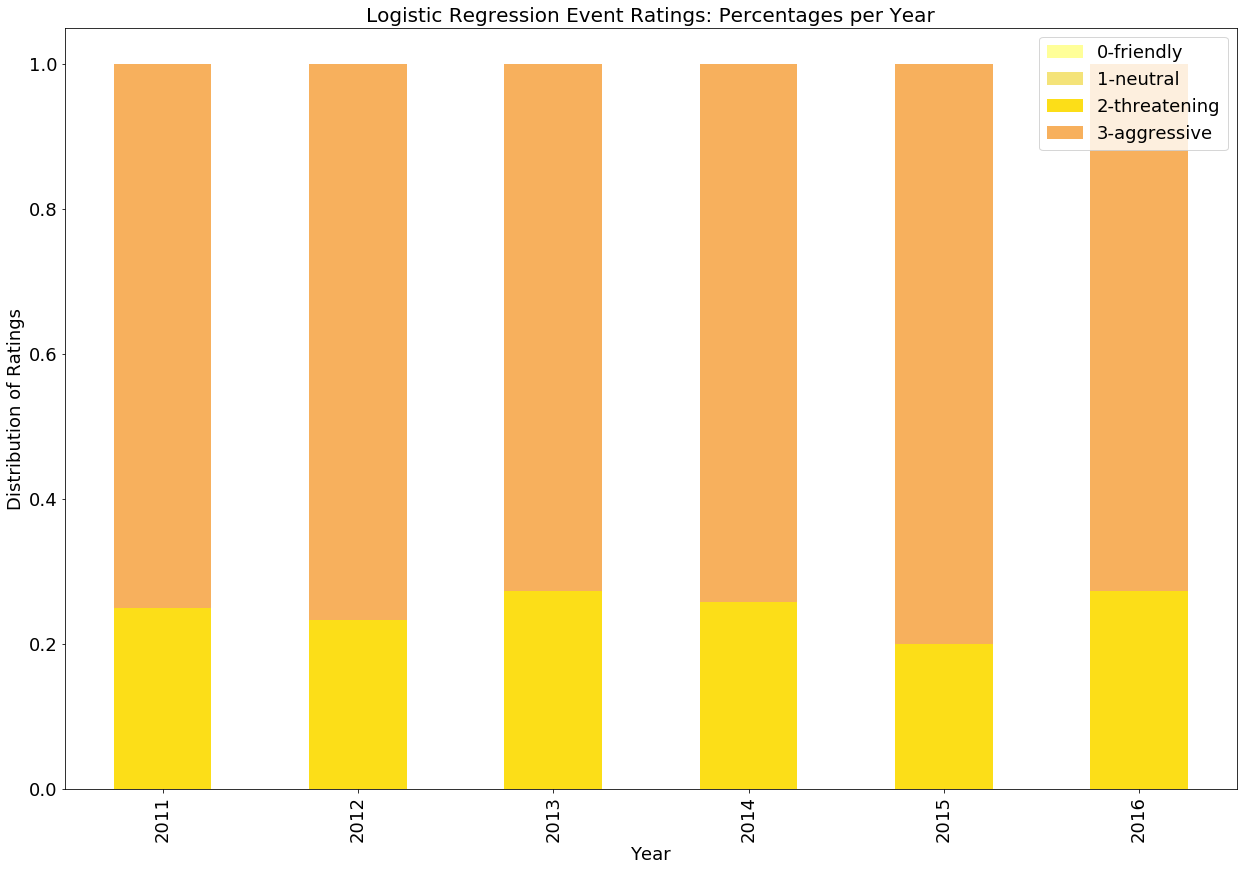

In [76]:
LR_colors = ['#FFFF99','#f4e379','#fcde18','#f7b05d']
ax = LRdf[['0-friendly', '1-neutral', '2-threatening', '3-aggressive']].plot(kind='bar', stacked=True, title ="Logistic Regression Event Ratings: Percentages per Year",
                                                                               figsize=(21,14), color=LR_colors, legend=True, fontsize=18)
ax.set_xlabel("Year",fontsize=18)
ax.set_ylabel("Distribution of Ratings",fontsize=18)

ax.legend(loc=1, prop={'size': 18})
ax.title.set_fontsize(20)
plt.show()

## Visualize Natural Language Processing Event Ratings

In [77]:
# Read in data = Date, TeamRating, Predicted (Average),Predicted (Mode)

NLPratings = pd.read_csv('OurRatingsVsPredictions.csv', encoding='utf-8')
NLPratings = NLPratings.sort_values(by='Date')
NLPratings['Date'] = pd.to_datetime(NLPratings['Date'])

In [78]:
# Prepare the dataframe for visualization

# Split out month and year for grouping
monthlist = []
daylist = []
yearlist = []
for index, row in NLPratings.iterrows():
    monthlist.append(row['Date'].strftime('%m'))
    daylist.append(row['Date'].strftime('%d'))
    yearlist.append(row['Date'].strftime('%Y'))
NLPratings['Day'] = daylist
NLPratings['Month'] = monthlist
NLPratings['Year'] = yearlist

NLPratings['Year'] = NLPratings['Year'].astype(int)
NLPratings['Month'] = NLPratings['Month'].astype(int)
NLPratings['Predicted (Average)'] = NLPratings['Predicted (Average)'].astype(int)

NLPratings = NLPratings.rename(columns={'Predicted (Average)': 'NLP_Rating'})
NLPratings.head()

,Date,TeamRating,NLP_Rating,Predicted (Mode),Day,Month,Year
0,2011-01-31,2-threatening,2,[2],31,1,2011
1,2011-03-11,3-aggressive,3,[3],11,3,2011
2,2011-03-26,0-friendly,0,[0],26,3,2011
3,2011-04-07,1-neutral,1,[1],07,4,2011
4,2011-04-16,1-neutral,1,[1],16,4,2011


### Create Visualization of Raw Event Rating Counts for NLP Event Ratings

In [79]:
NLPdf = pd.crosstab(NLPratings.Year, NLPratings.NLP_Rating, margins=False)
NLPdf = NLPdf.rename(columns={0: '0-friendly', 1: '1-neutral', 2: '2-threatening', 3: '3-aggressive' })
NLPdf

NLP_Rating,0-friendly,1-neutral,2-threatening,3-aggressive
Year,,,,
2011,1,6,10,17
2012,0,6,16,14
2013,0,6,4,9
2014,0,5,5,8
2015,0,5,8,8
2016,3,5,7,5


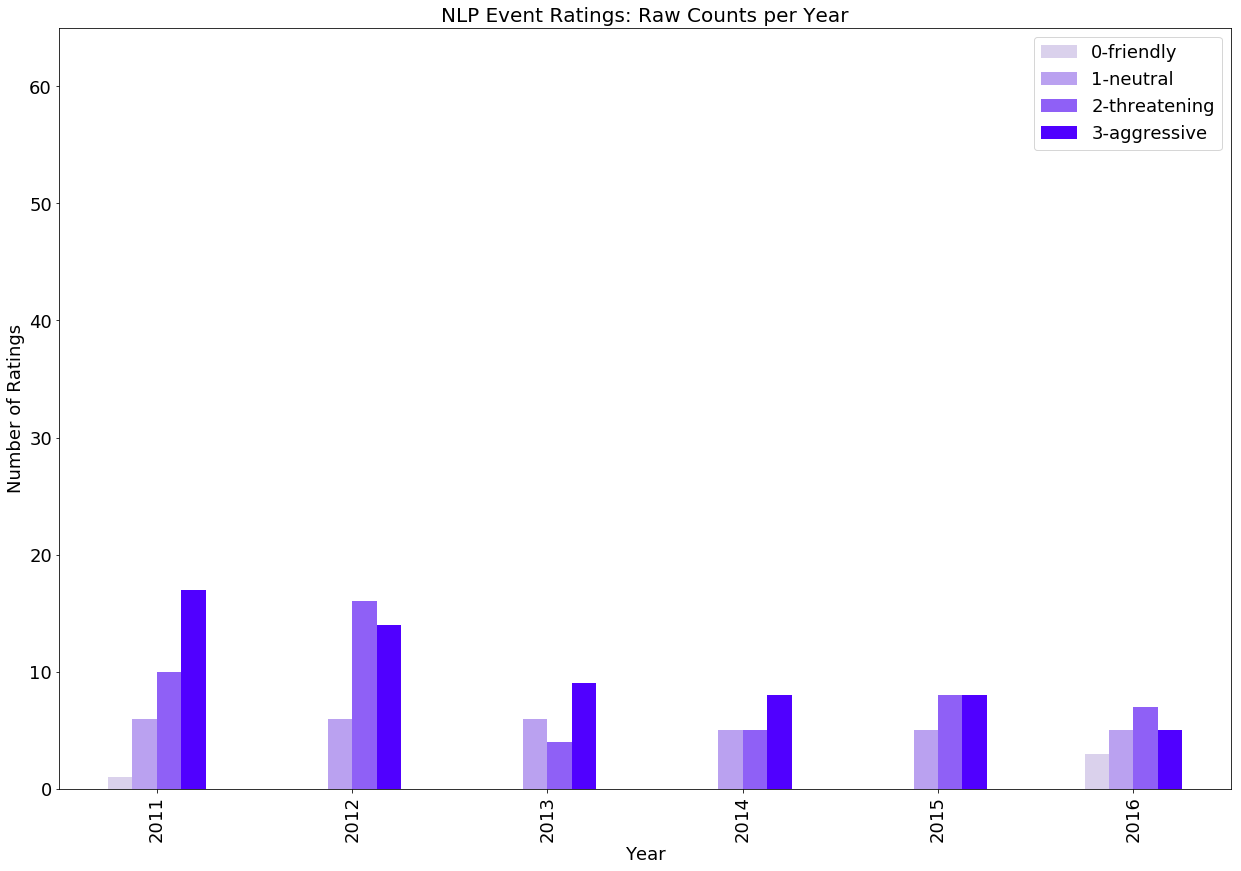

In [80]:
NLP_colors = ['#dad1ec','#baa1f0','#8f60f6','#5000ff']
ax = NLPdf[['0-friendly', '1-neutral', '2-threatening', '3-aggressive']].plot(kind='bar', title ="NLP Event Ratings: Raw Counts per Year",
                                                                               figsize=(21,14), color=NLP_colors, legend=True, fontsize=18)
ax.set_xlabel("Year",fontsize=18)
ax.set_ylabel("Number of Ratings",fontsize=18)
ax.set_ylim(0,65)
ax.legend(loc=1, prop={'size': 18})
ax.title.set_fontsize(20)
plt.show()

### Create Visualization of Event Rating Percentages for NLP Event Ratings

In [81]:
NLPdf = pd.crosstab(NLPratings.Year, NLPratings.NLP_Rating, normalize='index', margins=False)
NLPdf = NLPdf.rename(columns={0: '0-friendly', 1: '1-neutral', 2: '2-threatening', 3: '3-aggressive' })
NLPdf

NLP_Rating,0-friendly,1-neutral,2-threatening,3-aggressive
Year,,,,
2011,0.029412,0.176471,0.294118,0.500000
2012,0.000000,0.166667,0.444444,0.388889
2013,0.000000,0.315789,0.210526,0.473684
2014,0.000000,0.277778,0.277778,0.444444
2015,0.000000,0.238095,0.380952,0.380952
2016,0.150000,0.250000,0.350000,0.250000


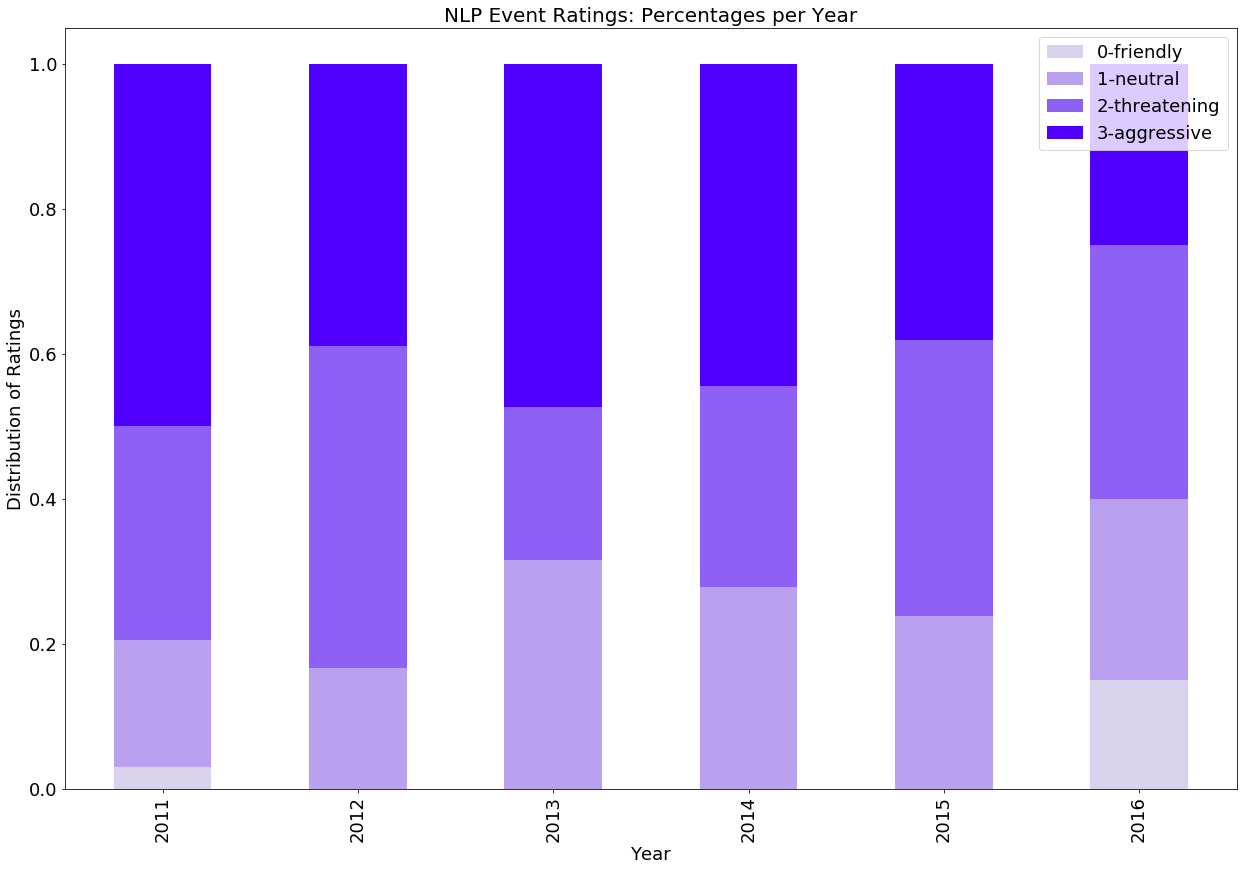

In [82]:
NLP_colors = ['#dad1ec','#baa1f0','#8f60f6','#5000ff']
ax = NLPdf[['0-friendly', '1-neutral', '2-threatening', '3-aggressive']].plot(kind='bar', stacked=True, title ="NLP Event Ratings: Percentages per Year",
                                                                               figsize=(21,14), color=NLP_colors, legend=True, fontsize=18)
ax.set_xlabel("Year",fontsize=18)
ax.set_ylabel("Distribution of Ratings",fontsize=18)

ax.legend(loc=1, prop={'size': 18})
ax.title.set_fontsize(20)
plt.show()

# Show Distribution of Event Ratings by Rating Method and Year

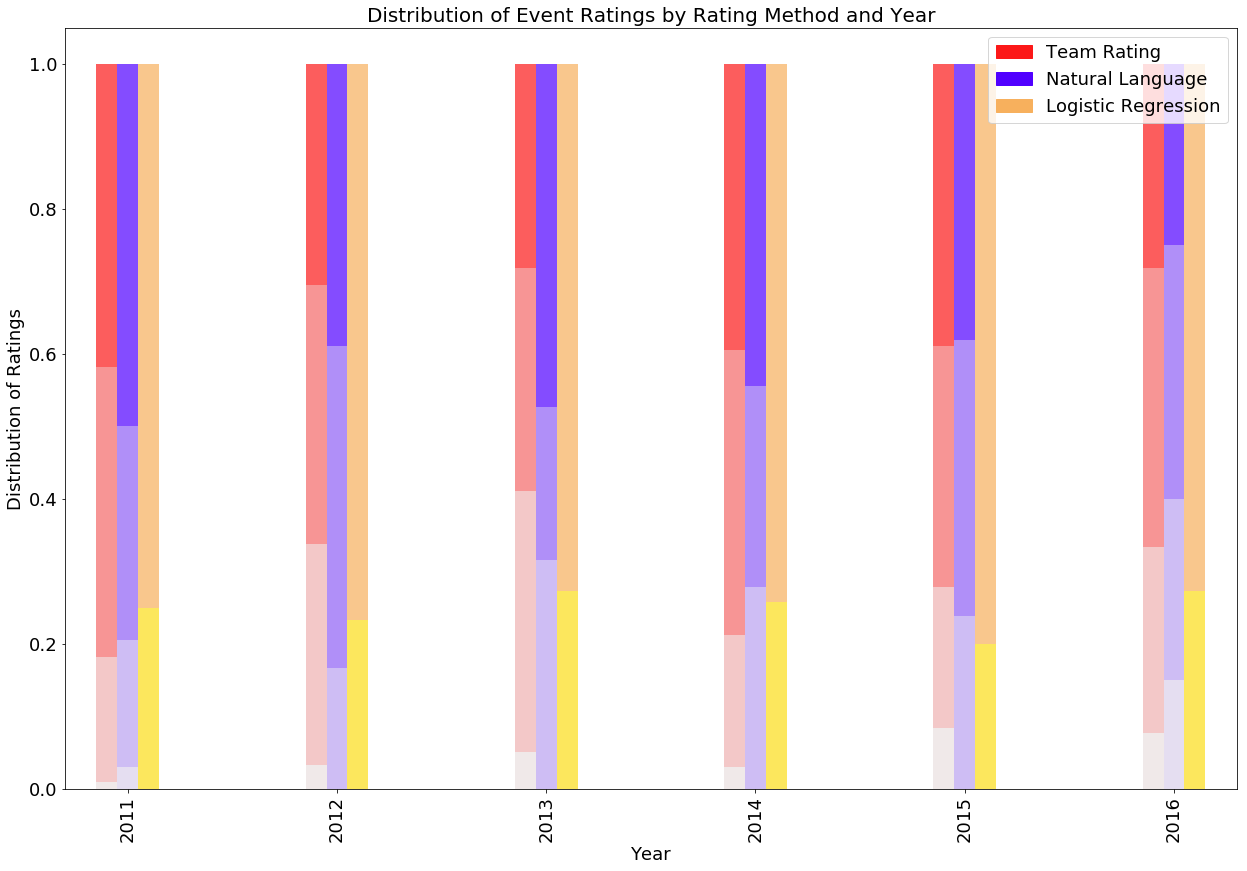

In [83]:
teamdf["Name"] = "teamdf"
LRdf["Name"] = "LRdf"
NLPdf["Name"] = "NLPdf"

fig, ax = plt.subplots()
teamdf[['0-friendly', '1-neutral', '2-threatening', '3-aggressive']].plot.bar(stacked=True, width=0.1, legend=False, position=1.5, color=team_colors, figsize=(21,14), fontsize=18, ax=ax, alpha=0.7)
LRdf[['0-friendly', '1-neutral', '2-threatening', '3-aggressive']].plot.bar(stacked=True, width=0.1, legend=False, position=-0.5, color=LR_colors, figsize=(21,14), fontsize=18, ax=ax, alpha=0.7)
NLPdf[['0-friendly', '1-neutral', '2-threatening', '3-aggressive']].plot.bar(stacked=True, width=0.1, legend=False, position=0.5, color=NLP_colors, figsize=(21,14), fontsize=18, ax=ax, alpha=0.7)

team = mpatches.Patch(color='#FC1818', label='Team Rating')
LR = mpatches.Patch(color='#f7b05d', label='Logistic Regression')
NLP = mpatches.Patch(color='#5000ff', label='Natural Language')
plt.legend(handles=[team,NLP,LR], loc=1, prop={'size': 18})

plt.title('Distribution of Event Ratings by Rating Method and Year')
ax.set_xlabel("Year",fontsize=18)
ax.set_ylabel("Distribution of Ratings",fontsize=18)
ax.title.set_fontsize(20)
plt.show()